<a href="https://colab.research.google.com/github/Douglas-cc/MLPClassificationEnem2016/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://iconape.com/wp-content/files/tf/195251/svg/195251.svg" width="200" height="200" text-align: center>
</p>  

Avaliação da disciplina de inteligencia Artificial do curso de Bacharelado em Ciência da Computação da Universidade Federal do Amapá 

- Profº Thiago Pinheiro 
- Academico: Douglas da Silva Sousa 
- Academica: Raniely Fuziel dos Anjos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import  train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(10, 10)

In [ ]:
df_teste = pd.read_csv("/content/drive/MyDrive/ap2-MLP/test.csv")
df_treino = pd.read_csv("/content/drive/MyDrive/ap2-MLP/train.csv")

df_treino = df_treino.drop(columns="Unnamed: 0")

In [ ]:
df_treino.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [ ]:
df_treino.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=166)

In [ ]:
df_teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,475.0,557.8,542.0,1,1.0,120.0,120.0,80.0,120.0,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,440.5,596.1,594.2,1,1.0,160.0,160.0,160.0,160.0,80.0,720.0,E,E,E,B,B,B,D,A


In [ ]:
# Algumas Caracteristicas Estatísticas
df_treino.describe()

,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4.282000e+03,4.282000e+03,4282.000000,4282.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,13730.0,...,13730.0,13730.000000,13730.0,13730.0,13730.0,13730.000000,13730.000000,1638.000000,1.373000e+04,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000,6355.000000,6355.000000,6354.000000,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,2.146176,1.353532,1.178888,0.129862,3.121720e+07,3.123638e+06,31.085474,2.259692,1.030827,1.001635,0.001238,0.0,0.000364,0.000510,0.0,0.002185,0.000146,0.000947,0.000073,0.000073,0.0,0.000437,0.000510,0.009687,0.000947,0.001602,0.000146,0.0,0.004151,0.0,...,0.0,0.000073,0.0,0.0,0.0,0.000364,0.119301,30.639194,3.085637e+06,30.709250,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,482.497928,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,4.083467,3.833360,2.608812,4.375984,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,3.217328,0.558472,0.565490,0.336163,9.540289e+06,9.574114e+05,9.546193,0.698586,0.172868,0.040404,0.035167,0.0,0.019080,0.022575,0.0,0.046695,0.012069,0.030757,0.008534,0.008534,0.0,0.020901,0.022575,0.097947,0.030757,0.039998,0.012069,0.0,0.064301,0.0,...,0.0,0.008534,0.0,0.0,0.0,0.019080,0.324154,9.884543,9.888721e+05,9.860227,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,99.826323,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,1.603004,1.661301,2.234009,1.210998,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100189e+07,1.100023e+06,11.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,11.000000,1.100023e+06,11.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
features = list(df_teste.columns)
features.append('IN_TREINEIRO')
df_treino = df_treino[features]

In [ ]:
# Salvando o numero de inscrição dos estudades que é o que vai indentifica-lhos lá na frente na resposta final
treino_nu_insc = df_treino['NU_INSCRICAO']
teste_nu_insc = df_teste['NU_INSCRICAO']

# como se trata de uma string, vamos ter que eliminar para evitar erros futuros com sklearn
df_treino.drop('NU_INSCRICAO', 1, inplace = True)
df_teste.drop('NU_INSCRICAO', 1, inplace = True)

In [ ]:
# Vamos trabalhar aqui com dados categoricos e por isso, para não comprometrar nossa coluna target que vai servir para nosso classificador
# vamos salvar ela em uma variavel e posteriormente realocar em nosso dataframe a pos todo o processo de tratamento com variveis categoricas
# estiver concluido.
treineiro = df_treino['IN_TREINEIRO']
df_treino.drop('IN_TREINEIRO',1 ,inplace=True)

# Aqui convertemos nossos features categoricas em features dummies ou seja se por exemplo houver Para, Amapa, Piauí ele ira substituir por 0, 1, 2
# vale resaltar fizemos join de nossos dataframes para esse processo e aplicamos esta tecnica para tudo.
dummies = pd.get_dummies(df_treino.append(df_teste))

# Pegamos o tamanho do dataset de treino para varrer apartir dele o nossos datasets com o comando iloc do pandas
# o que possibilitara separar em treino e teste novamente
df_lenght = len(df_treino)

# Aqui varremos os datasets e separamos em treino e teste novamente
df_treino = dummies.iloc[:df_lenght]
df_teste = dummies.iloc[df_lenght:]

# E por fim fazemos um join da coluna iN_TREINEIRO novamente.
df_treino['IN_TREINEIRO'] = treineiro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_treino.head() # Resultado do Processo

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,...,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q027_A,Q027_B,Q027_C,Q027_D,Q027_E,Q027_F,Q027_G,Q027_H,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E,IN_TREINEIRO
0,43,24,1,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,23,17,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,23,21,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,33,25,0,1,1,9,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,13,28,2,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# Tratando Dados Faltantes

In [ ]:
# Gerando tabela percentual de dados faltantes para treino
total = df_treino.isnull().sum().sort_values(ascending=False)
percentual = (df_treino.isnull().sum()/df_treino.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percentual], axis=1,join='outer', keys=['Dados Ausentes', '% Percentual'])
missing_data.index.name ='Variaveis numericas'
missing_data.head(14)

,Dados Ausentes,% Percentual
Variaveis numericas,,
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
TP_ENSINO,9448,0.688128
NU_NOTA_COMP3,3597,0.261981
NU_NOTA_LC,3597,0.261981
TP_STATUS_REDACAO,3597,0.261981
NU_NOTA_COMP1,3597,0.261981
NU_NOTA_COMP2,3597,0.261981
NU_NOTA_COMP4,3597,0.261981
NU_NOTA_COMP5,3597,0.261981


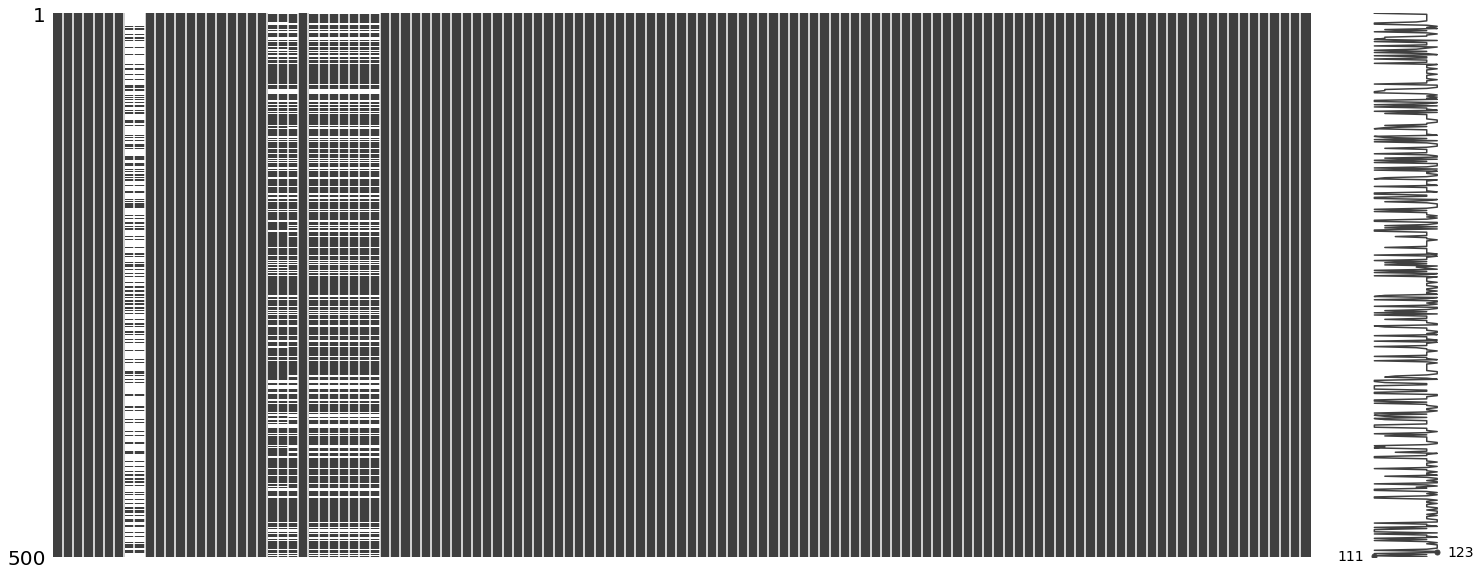

In [ ]:
# Por fim, vamos visualizar em uma pequena amostra os nosso dados faltantes
msno.matrix(df_treino.sample(500)) 

In [ ]:
# Preenchendo os valores faltantes com zero 
df_treino = df_treino.fillna(0)
df_teste = df_teste.fillna(0)

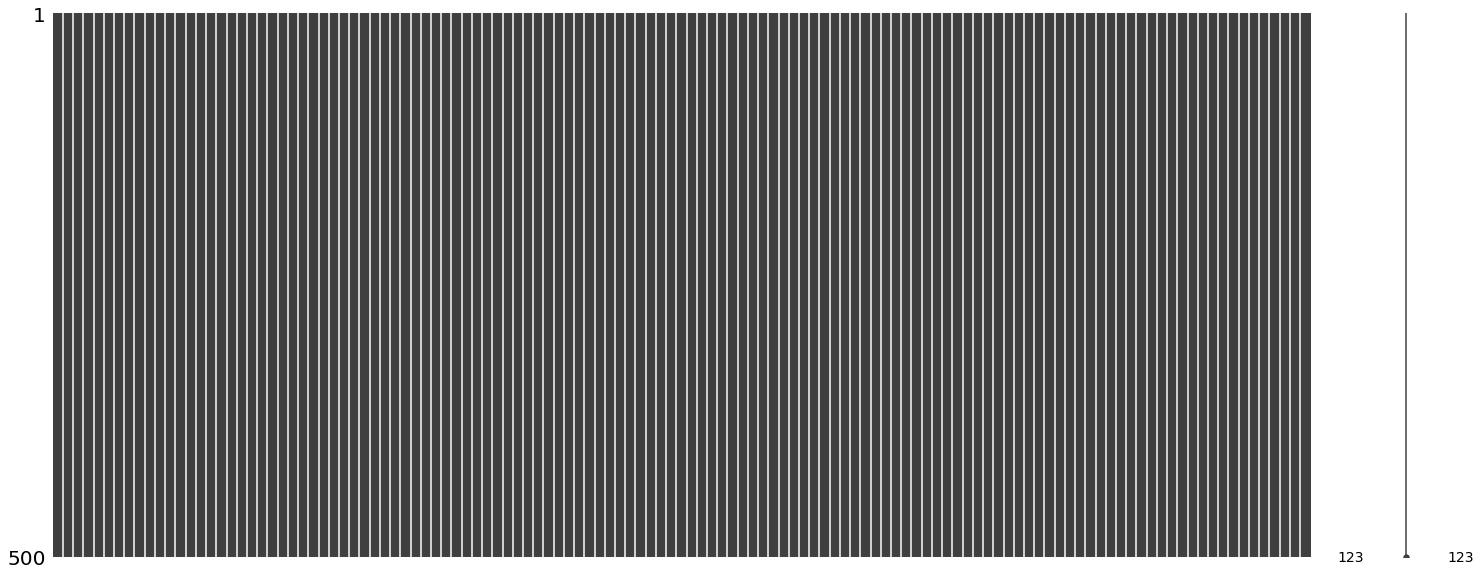

In [ ]:
msno.matrix(df_treino.sample(500))

# Target 

In [ ]:
# 0 - FALSE: Alunos que Não fizeram o enem treinar e 1 - TRUE: fizeram o enem treinar
df_treino.IN_TREINEIRO.value_counts() 

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

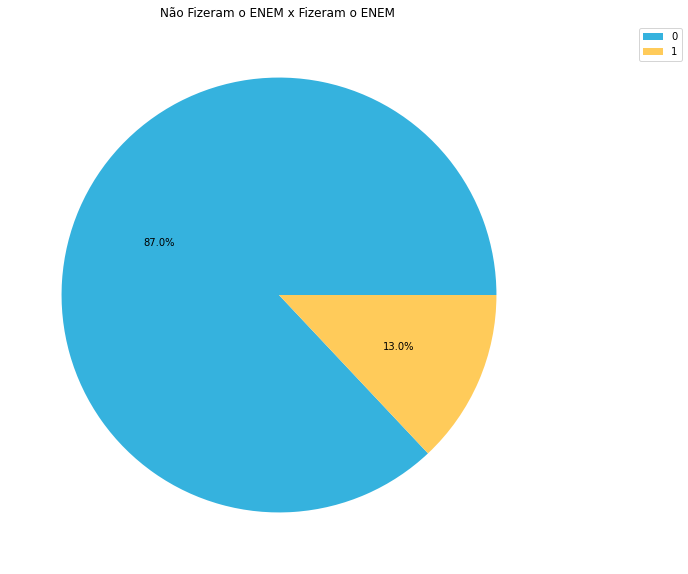

In [ ]:
colors = ['#35b2de','#ffcb5a'] # Apenas escolhando as cores

labels = df_treino.IN_TREINEIRO.value_counts().index
plt.pie(df_treino.IN_TREINEIRO.value_counts(),autopct = '%1.1f%%', colors = colors) # Ocorrências de cada classe e a porcentagem
plt.legend(labels,bbox_to_anchor = (1.25, 1),) # Nossas Legendas
plt.title('Não Fizeram o ENEM x Fizeram o ENEM ')
plt.show()

In [ ]:
y = df_treino.IN_TREINEIRO # Variavel alvo, o que desejamos classificar 
X = df_treino.drop("IN_TREINEIRO", axis= 1) # demais dados, aqui excluimos a coluna treineiro
print(f'Antes de balancear os dados: {np.bincount(y)}')

Antes de balancear os dados: [11947  1783]


# Separando em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)
- Gera dados sintéticos da classe minoritária.

In [ ]:
smt = SMOTE()

X, y = smt.fit_sample(X, y)
print(f'Depois de balancear os dados: {np.bincount(y)}')

# Gerando o Classificador 

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train) # classificador

In [ ]:
y_pred = clf.predict(X_test) # valores preditos 

In [ ]:
print(f'Acuracia: {clf.score(X_test, y_test) * 100}') 

Acuracia: 97.6982632349864


In [ ]:
print(classification_report(y_test, y_pred)) # Algumas Metricas de avaliação do modelo 

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2389
           1       0.96      1.00      0.98      2390

    accuracy                           0.98      4779
   macro avg       0.98      0.98      0.98      4779
weighted avg       0.98      0.98      0.98      4779



In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True)) # Cross Validation

Predito     0     1   All
Real                     
0        2281   108  2389
1           2  2388  2390
All      2283  2496  4779


# Dataset de Respostas

In [ ]:
pred = clf.predict(df_teste)
pred_treineiro = pd.Series(pred)

In [ ]:
answer = pd.concat([teste_nu_insc, pred_treineiro], axis =1)
answer.rename(columns={0:'IN_TREINEIRO'}, inplace=True)

In [ ]:
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0




# Referências 

Documentação do Sklearn: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification